In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut

In [13]:
data = pd.read_csv('data/Auto.csv', na_values='?').dropna()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [15]:
data_train = data.sample(196, random_state=1)
data_test = data[~data.isin(data_train)].dropna()
X_train, y_train = data_train['horsepower'].values.reshape(-1,1), data_train['mpg']
X_test, y_test = data_test['horsepower'].values.reshape(-1,1), data_test['mpg']

In [16]:
lm = LinearRegression().fit(X_train, y_train)
lm_pred = lm.predict(X_test)
MSE = mean_squared_error(y_test, lm_pred)
print(MSE)

23.361902892587224


In [17]:
def result_poly_mse(degree, X_train, y_train, X_test, y_test):
    X_train = PolynomialFeatures(degree=degree).fit_transform(X_train)
    X_test = PolynomialFeatures(degree=degree).fit_transform(X_test)
    poly = LinearRegression().fit(X_train, y_train)
    poly_pred = poly.predict(X_test)
    MSE = mean_squared_error(y_test, poly_pred)
    print(MSE)

In [18]:
# Perform Polynominal degree 2
result_poly_mse(2, X_train, y_train, X_test, y_test)

20.252690858347492


In [19]:
# Perform Polynominal degree 3
result_poly_mse(3, X_train, y_train, X_test, y_test)

20.325609366315668


In [20]:
# Perform Polynominal degree 4
result_poly_mse(4, X_train, y_train, X_test, y_test)

20.343887109400615


In [21]:
X = data['horsepower'].values.reshape(-1,1)
y = data['mpg'].values.reshape(-1,1)
crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1)

print('Folds: {}, MSE: {:.2f}, std: {:.2f}'.format(len(scores), np.abs(scores.mean()), scores.std()))

Folds: 392, MSE: 24.23, std: 36.80


In [22]:
def result_mse(degree_start, degree_stop, X, y, k_fold):
    for i in range(degree_start, degree_stop+1):
        X_current = PolynomialFeatures(degree=i).fit_transform(X)
        model = LinearRegression()
        crossvalidation = KFold(n_splits=k_fold, random_state=1, shuffle=True)
        scores = cross_val_score(model, X_current, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1)
        print('Dregree: {}, Folds: {}, MSE: {:.2f}, std: {:.2f}'.format(i, len(scores), np.abs(scores.mean()), scores.std()))

In [23]:
result_mse(1, 8, X, y, 392)

Dregree: 1, Folds: 392, MSE: 24.23, std: 36.80
Dregree: 2, Folds: 392, MSE: 19.25, std: 35.00
Dregree: 3, Folds: 392, MSE: 19.33, std: 35.77
Dregree: 4, Folds: 392, MSE: 19.42, std: 35.68
Dregree: 5, Folds: 392, MSE: 19.03, std: 35.32
Dregree: 6, Folds: 392, MSE: 18.97, std: 35.33
Dregree: 7, Folds: 392, MSE: 19.13, std: 35.25
Dregree: 8, Folds: 392, MSE: 19.22, std: 35.38


In [24]:
result_mse(1, 8, X, y, 5)

Dregree: 1, Folds: 5, MSE: 24.17, std: 4.14
Dregree: 2, Folds: 5, MSE: 19.32, std: 3.72
Dregree: 3, Folds: 5, MSE: 19.30, std: 3.69
Dregree: 4, Folds: 5, MSE: 19.34, std: 3.38
Dregree: 5, Folds: 5, MSE: 18.98, std: 2.99
Dregree: 6, Folds: 5, MSE: 18.89, std: 2.79
Dregree: 7, Folds: 5, MSE: 19.11, std: 2.67
Dregree: 8, Folds: 5, MSE: 19.28, std: 2.81


In [25]:
result_mse(1, 8, X, y, 10)

Dregree: 1, Folds: 10, MSE: 24.10, std: 4.82
Dregree: 2, Folds: 10, MSE: 19.18, std: 5.13
Dregree: 3, Folds: 10, MSE: 19.21, std: 5.14
Dregree: 4, Folds: 10, MSE: 19.21, std: 4.93
Dregree: 5, Folds: 10, MSE: 18.76, std: 4.70
Dregree: 6, Folds: 10, MSE: 18.64, std: 4.52
Dregree: 7, Folds: 10, MSE: 18.82, std: 4.57
Dregree: 8, Folds: 10, MSE: 18.98, std: 4.71


In [26]:
# Visualize
def display_k_fold(degree_start, degree_stop, X, y, k_fold):
    # Some initial setup
    crossvalidation = KFold(n_splits=k_fold, random_state=1, shuffle=True)
    model = LinearRegression()
    row = np.arange(degree_start, degree_stop+1)
    col = np.arange(1, k_fold+1)
    result = pd.DataFrame(columns=col)
    # Create table result for all fold with all degree of Polynominal Regression
    for i in range(degree_start, degree_stop+1):
        X_current = PolynomialFeatures(degree=i).fit_transform(X)
        scores = cross_val_score(model, X_current, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1)
        result = result.append(pd.Series(np.abs(scores)), ignore_index=True)
    result['MSE'] = result.mean(axis=1)
    result['SE'] = result.std(axis=1)
    # Start Plot line result and Mean Squared Error line final
    plt.figure(figsize=(12,8))
    for j in result.columns:
        plt.plot(row, result[j], linestyle = '-.', marker='o', alpha=0.5)
    plt.plot(row, result['MSE'], linestyle = '-', marker='o', color='k', linewidth=3, label='MSE')
    plt.title('{}-fold CV'.format(k_fold))
    plt.xlabel('Degree of Polynominal')
    plt.ylabel('Mean Squared Error with its variance')
    plt.plot([], [], ' ', label='Std of MSE: {:.2f}'.format(result['SE'].mean()))
    # plt.text(6,20,'Mean Standard error: {:.2f}'.format(result['SE'].mean()))
    plt.legend()
    plt.show()
    # display(result['MSE'])
    # display(result['SE'])

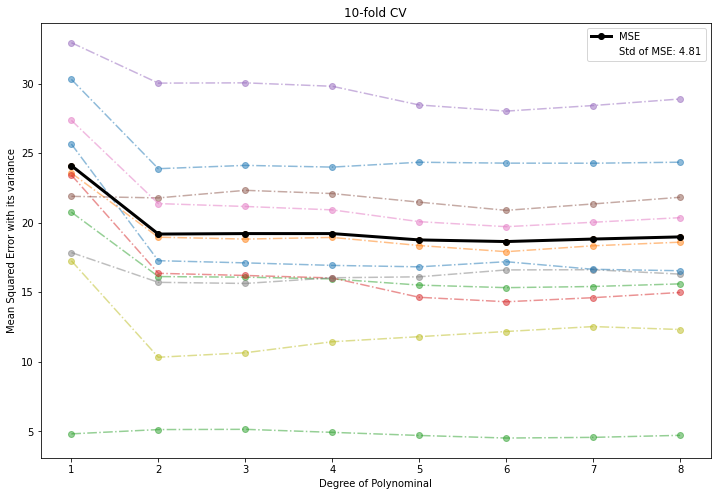

In [27]:
display_k_fold(1, 8, X, y, 10)

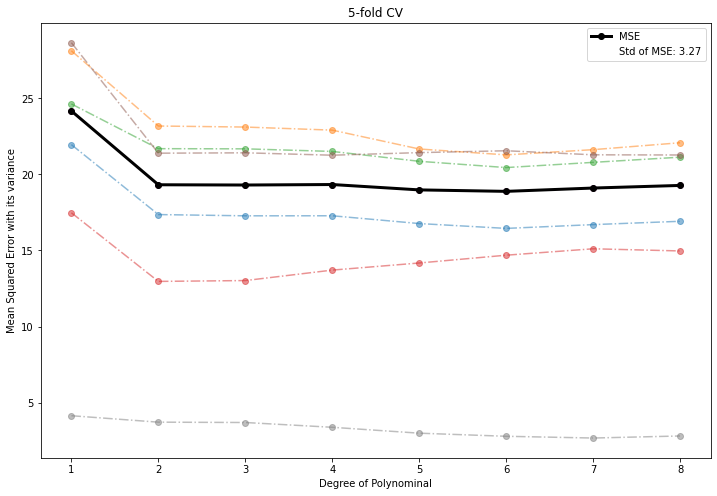

In [28]:
display_k_fold(1, 8, X, y, 5)

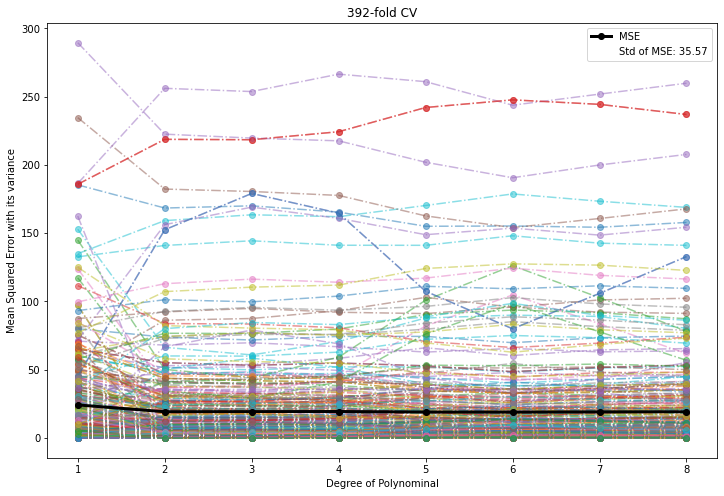

In [29]:
display_k_fold(1, 8, X, y, 392)